In [1]:
import sys
sys.path.append('..')
import warnings
warnings.simplefilter("ignore", category=UserWarning)

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from data_sources.get import get_indicators

In [2]:
raw_df = get_indicators(['SP.POP.GROW'])

df = raw_df.drop(columns=["Country Code", "Indicator Code", "Indicator Name"])
df = df.pivot(index="Year", values="Value", columns="Country Name")
df = df.loc[1980:]
df.head()

Country Name  Afghanistan  Africa Eastern and Southern  \
Year                                                     
1980            -0.407658                     2.974336   
1981            -1.393416                     2.970648   
1982            -2.219780                     2.965384   
1983            -2.712854                     2.965636   
1984            -2.695382                     2.975573   

Country Name  Africa Western and Central   Albania   Algeria  American Samoa  \
Year                                                                           
1980                            2.781425  2.047964  3.030949        2.499743   
1981                            2.784998  2.002974  3.087059        3.162521   
1982                            2.787465  2.113272  3.121642        3.705314   
1983                            2.786851  2.120885  3.123717        4.046390   
1984                            2.783817  2.103937  3.087594        4.123824   

Country Name   Andorra    Angola  Antigua and Barbuda  Arab World  ...  \
Year                                                               ...   
1980          3.493189  3.453859            -0.140539    3.267353  ...   
1981          3.902019  3.524002            -0.116458    3.210183  ...   
1982          4.221843  3.552753            -0.014567    3.160193  ...   
1983          4.349871  3.567178            -0.001619    3.109858  ...   
1984          4.433469  3.564179             0.008093    3.063230  ...   

Country Name  Uzbekistan   Vanuatu  Venezuela, RB   Vietnam  \
Year                                                          
1980            2.689072  2.678328       2.746701  2.209934   
1981            2.625390  2.518242       2.698379  2.260407   
1982            2.574967  2.377333       2.655137  2.299439   
1983            2.536518  2.292343       2.622139  2.320988   
1984            2.514304  2.264584       2.602651  2.319029   

Country Name  Virgin Islands (U.S.)  West Bank and Gaza     World  \
Year                                                                
1980                       3.527092                 NaN  1.748661   
1981                       0.217556                 NaN  1.764068   
1982                       0.215085                 NaN  1.800490   
1983                       0.279419                 NaN  1.784324   
1984                       0.250811                 NaN  1.747125   

Country Name  Yemen, Rep.    Zambia  Zimbabwe  
Year                                           
1980             3.487555  3.400982  3.413262  
1981             3.586454  3.419161  3.539858  
1982             3.693147  3.417329  3.616362  
1983             3.765405  3.389747  3.658056  
1984             3.802102  3.332364  3.657575  

[5 rows x 265 columns]

In [3]:
countries_with_nans = df.isna().count()[df.isna().any() == True]
countries_with_nans

Country Name
Eritrea               41
Kuwait                41
New Zealand           41
West Bank and Gaza    41
dtype: int64

In [4]:
df_cleared = df.drop(columns=countries_with_nans.index.values)
len(df_cleared.columns)

261

In [5]:
countries = ['Poland', 'Ukraine', 'Czech Republic', 'Zimbabwe', 'China', 'United States', 'Russian Federation', 'Japan', 'France']
df_to_visualise = df_cleared.loc[:, countries]
df_to_visualise.head()

Country Name    Poland   Ukraine  Czech Republic  Zimbabwe     China  \
Year                                                                   
1980          0.923267  0.436999        0.115087  3.413262  1.254221   
1981          0.907868  0.509305       -0.034963  3.539858  1.280952   
1982          0.920285  0.324040        0.138101  3.616362  1.472675   
1983          0.937689  0.356620        0.087506  3.658056  1.444950   
1984          0.904591  0.375057        0.061557  3.657575  1.312069   

Country Name  United States  Russian Federation     Japan    France  
Year                                                                 
1980               0.959590            0.709655  0.788153  0.444047  
1981               0.981415            0.667503  0.728461  0.486055  
1982               0.953318            0.628288  0.693656  0.519415  
1983               0.914379            0.598251  0.695583  0.545603  
1984               0.865817            0.757353  0.648317  0.558734

<AxesSubplot:xlabel='Year', ylabel='Population growth (%)'>

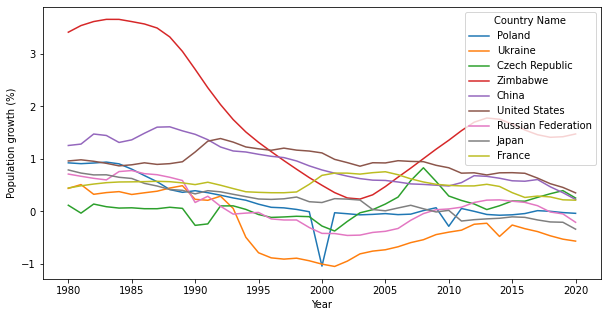

In [6]:
df_to_visualise.plot(figsize=(10, 5), ylabel='Population growth (%)')

In [7]:
X_base = df_cleared.values.T
X_base.shape

(261, 41)

In [8]:
countries = df_cleared.columns.values
countries.shape

(261,)

In [9]:
years = df_cleared.index.values
years.shape

(41,)

In [10]:
import time

def run_and_measure(fun, *args, **kwargs):
    start = time.time()
    retval = fun(*args, **kwargs)
    end = time.time()
    return retval, end - start

# Data preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_base)

def preprocess(X):
    # return scaler.transform(X)
    return X - 1.

def preprocess_inverse(X):
    # return scaler.inverse_transform(X)
    return X + 1.

In [12]:
X = preprocess(X_base)

# PCA

In [13]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X)

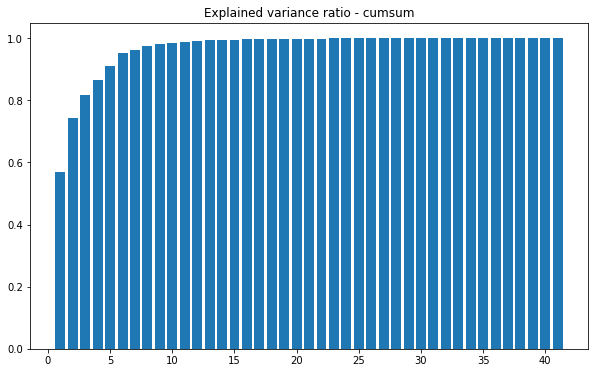

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(np.arange(1, pca.explained_variance_ratio_.shape[0]+1), pca.explained_variance_ratio_.cumsum())
plt.title('Explained variance ratio - cumsum')
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error

for i in range(1, 21):
    X_tmp = X_pca[:, :i] @ pca.components_[:i] + pca.mean_
    mse = mean_squared_error(X, X_tmp)
    print(f'First {i:2} components: mse={mse:0.6f}')

First  1 components: mse=0.975798
First  2 components: mse=0.580783
First  3 components: mse=0.415066
First  4 components: mse=0.304803
First  5 components: mse=0.204654
First  6 components: mse=0.109871
First  7 components: mse=0.084380
First  8 components: mse=0.059994
First  9 components: mse=0.044645
First 10 components: mse=0.033639
First 11 components: mse=0.026367
First 12 components: mse=0.020345
First 13 components: mse=0.016422
First 14 components: mse=0.013100
First 15 components: mse=0.010382
First 16 components: mse=0.008444
First 17 components: mse=0.007016
First 18 components: mse=0.005803
First 19 components: mse=0.004769
First 20 components: mse=0.003853


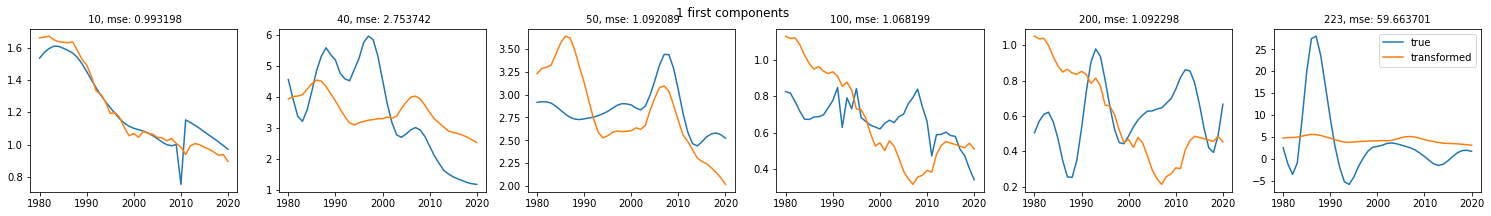

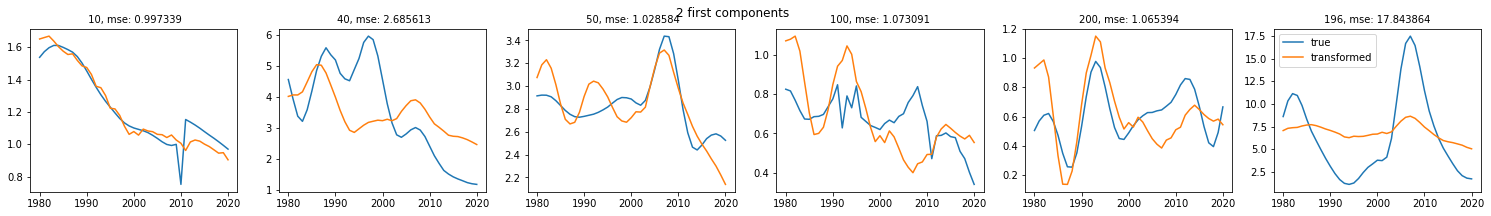

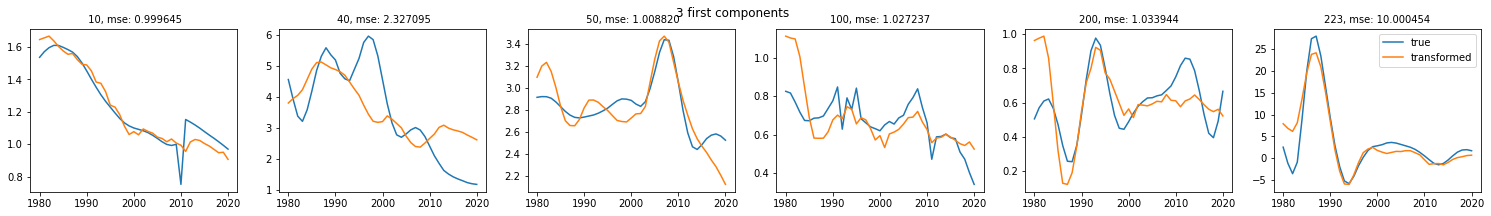

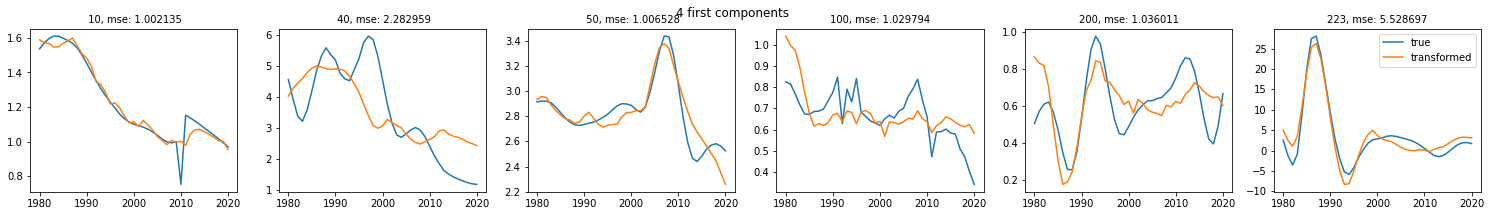

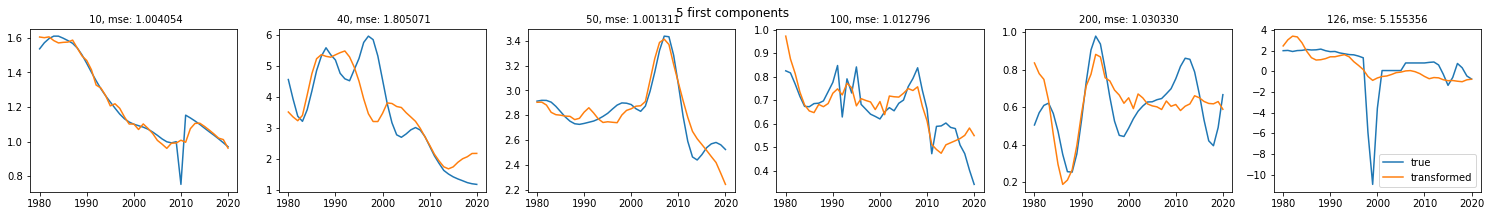

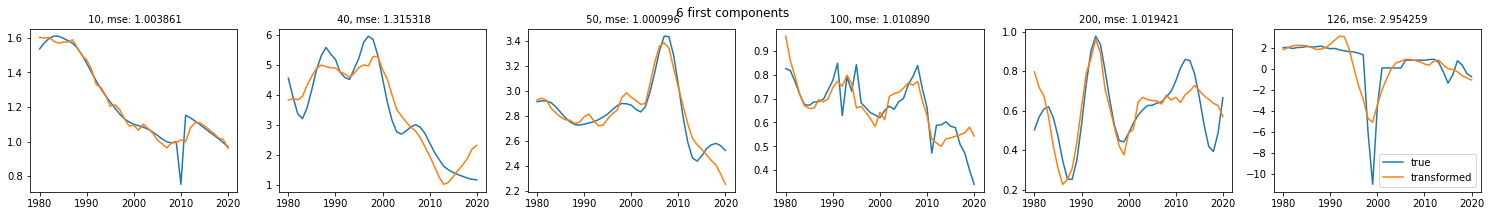

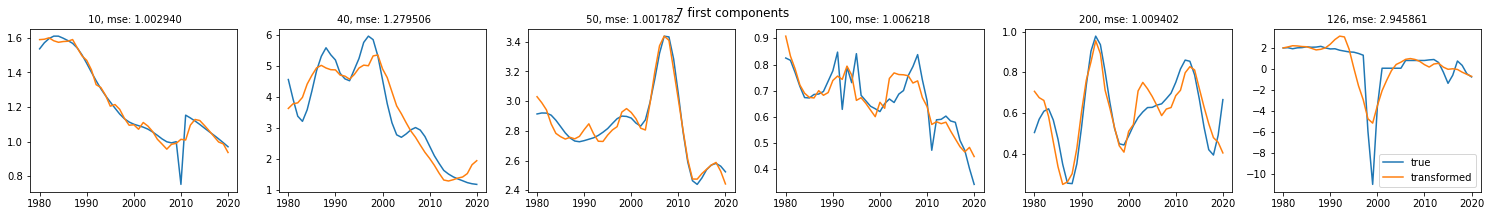

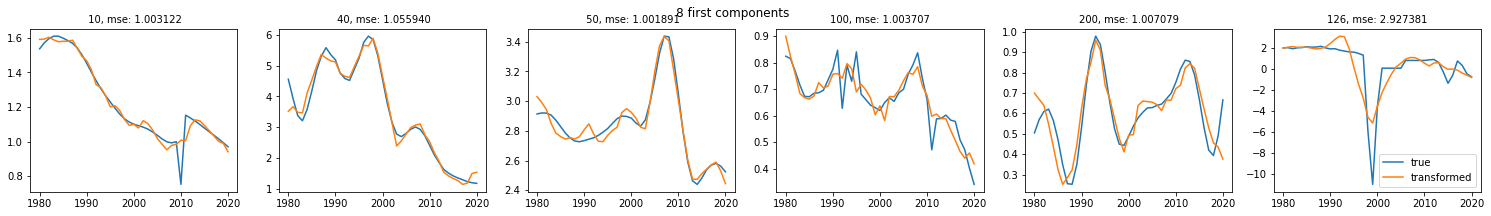

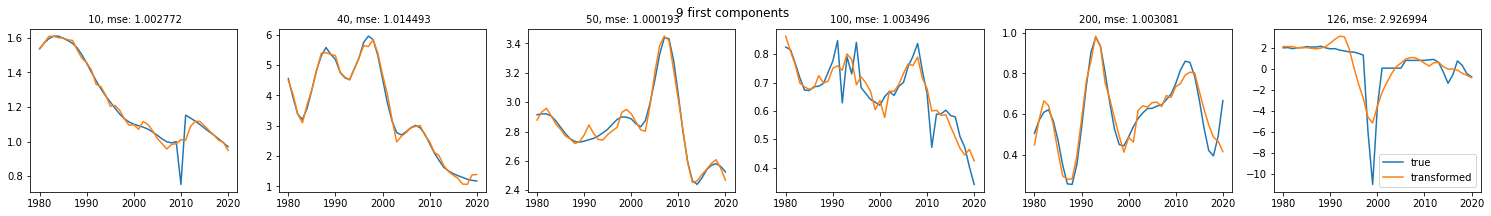

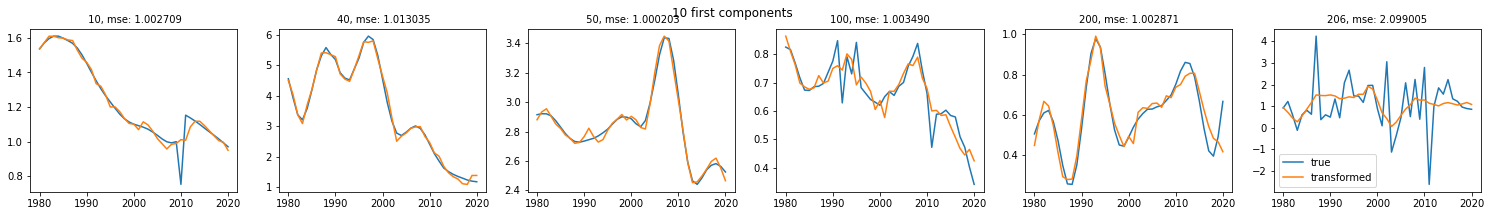

In [16]:
INDICES = [10, 40, 50, 100, 200]

for i in range(1, 11):
    plt.figure(figsize=(26, 3))
    X_tmp = preprocess_inverse(X_pca[:, :i] @ pca.components_[:i] + pca.mean_)
    mse_list = [mean_squared_error(x, x_tmp) for x, x_tmp in zip(X, X_tmp)]
    indices = INDICES + [np.argmax(mse_list)]
    for j, idx in enumerate(indices):
        plt.subplot(1, len(indices), j + 1)
        plt.plot(years, X_base[idx], label='true')
        plt.plot(years, X_tmp[idx], label='transformed')
        plt.title(f'{idx:3}, mse: {mse_list[idx]:0.6f}', fontsize=10)
    
    plt.suptitle(f'{i} first components')
    plt.legend()
    plt.show()

# Autoencoder v1

In [17]:
TRAIN_AUTOENCODERS = True

In [18]:
import tensorflow as tf
from tensorflow.keras import layers as tf_layers

def create_autoencoder_v1(n_bottleneck):
    autoencoder = tf.keras.Sequential([
        tf_layers.Input((X.shape[1], )),
        tf_layers.Dense(n_bottleneck, activation='relu'),
        tf_layers.Dense(X.shape[1])
    ])

    autoencoder.compile(tf.keras.optimizers.Adam(learning_rate=0.001),
                        loss='mse')
    return autoencoder

In [19]:
def test_autoencoder(create_model, n_start, n_end, name, batch_size=64, n_epochs=500, train=True):
    histories = {}
    models = {}
    
    for n_bottleneck in range(n_start, n_end):
        print(f'Starting {n_bottleneck}... ', end='')

        autoencoder_model = create_model(n_bottleneck)
        models[n_bottleneck] = autoencoder_model
        
        if train:
            history, t = run_and_measure(autoencoder_model.fit, X, X, batch_size=batch_size, verbose=0, epochs=n_epochs)
            print(f'{t:0.2f} s')
            history = history.history
            autoencoder_model.save_weights(f'model_checkpoints/{name}/{n_bottleneck}/weights')
            pd.DataFrame(history).to_csv(f'model_checkpoints/{name}/{n_bottleneck}/log.csv')
        else:
            history = pd.read_csv(f'model_checkpoints/{name}/{n_bottleneck}/log.csv')
            autoencoder_model.load_weights(f'model_checkpoints/{name}/{n_bottleneck}/weights')
            print()
        
        histories[n_bottleneck] = history
        
    return histories, models

def plot_histories(histories, title, ymax=0.6, n_epochs=500, print_mse=True):
    plt.figure(figsize=(12, 8))

    for n_bottleneck, history in histories.items():
        plt.plot(np.arange(1, n_epochs + 1), history['loss'], label=f'{n_bottleneck}')

    plt.ylim(0, ymax)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()
    
    for n_bottleneck, history in histories.items():
        print(f"n_bottleneck={n_bottleneck:2}: mse={min(history['loss']):0.6f}")
    
def plot_transformed_data_autoencoder(X_base, X, models, indices=INDICES, inverse=True):
    for i, (n_bottleneck, model) in enumerate(models.items()):
        plt.figure(figsize=(26, 3))
        
        X_tmp = model.predict(X)
        
        mse_list = [mean_squared_error(x, x_tmp) for x, x_tmp in zip(X, X_tmp)]
        current_indices = indices + [np.argmax(mse_list)]
        
        if inverse:
            X_tmp = preprocess_inverse(X_tmp)
        
        for j, idx in enumerate(current_indices):
            plt.subplot(1, len(current_indices), j + 1)
            plt.plot(years, X_base[idx], label='true')
            plt.plot(years, X_tmp[idx], label='transformed')
            plt.title(f'{idx:3}, mse: {mse_list[idx]:0.6f}', fontsize=10)

        plt.suptitle(f'n_bottleneck={n_bottleneck}')
        plt.legend()
        plt.show()

In [20]:
n_epochs_1 = 1500
histories_autoencoder_v1, models_autoencoder_v1 = test_autoencoder(create_autoencoder_v1, 1, 9, name='autoencoder_v1', n_epochs=n_epochs_1, train=TRAIN_AUTOENCODERS)

Starting 1... 18.89 s
Starting 2... 17.26 s
Starting 3... 16.78 s
Starting 4... 17.18 s
Starting 5... 18.09 s
Starting 6... 16.48 s
Starting 7... 17.15 s
Starting 8... 17.75 s


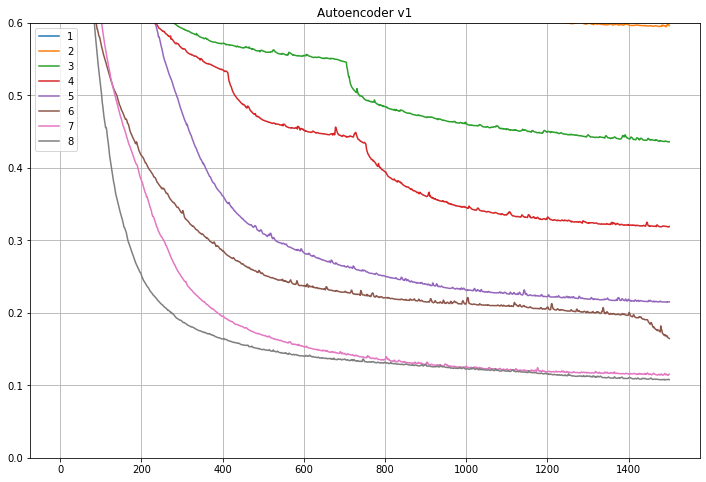

n_bottleneck= 1: mse=0.982786
n_bottleneck= 2: mse=0.594676
n_bottleneck= 3: mse=0.435831
n_bottleneck= 4: mse=0.318449
n_bottleneck= 5: mse=0.214750
n_bottleneck= 6: mse=0.164514
n_bottleneck= 7: mse=0.113894
n_bottleneck= 8: mse=0.107496


In [21]:
plot_histories(histories_autoencoder_v1, 'Autoencoder v1', n_epochs=n_epochs_1)

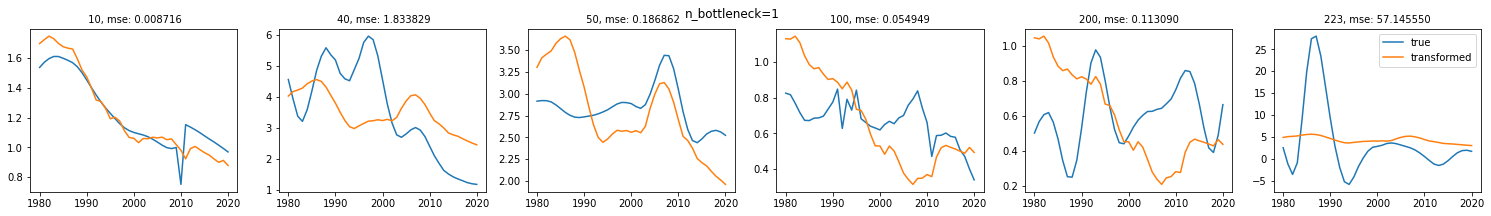

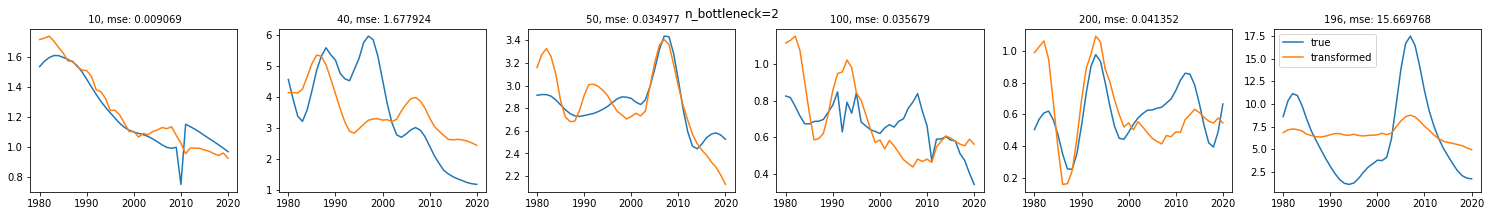

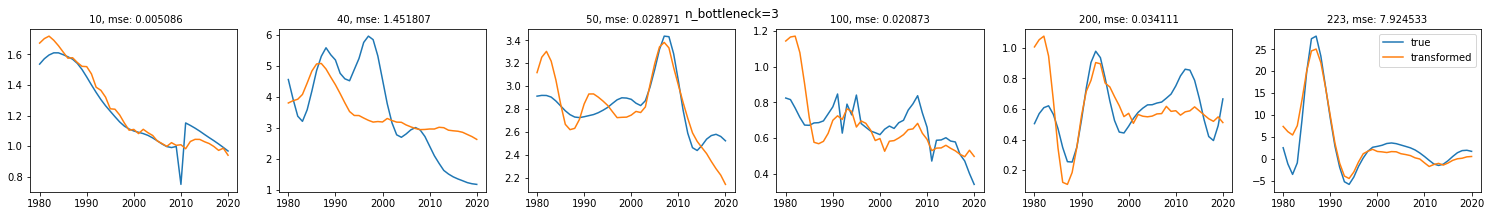

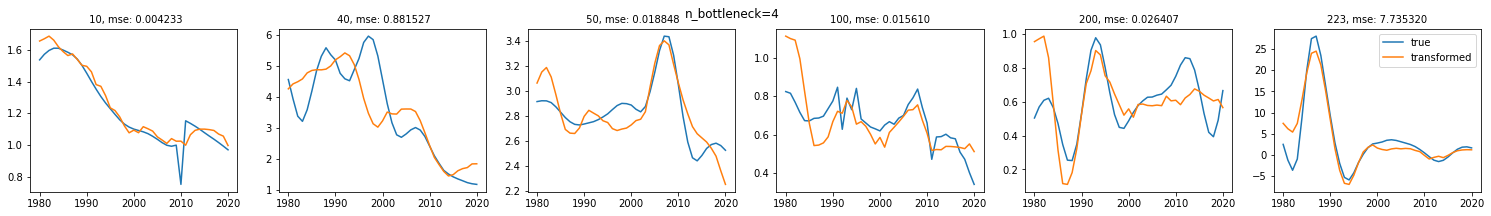

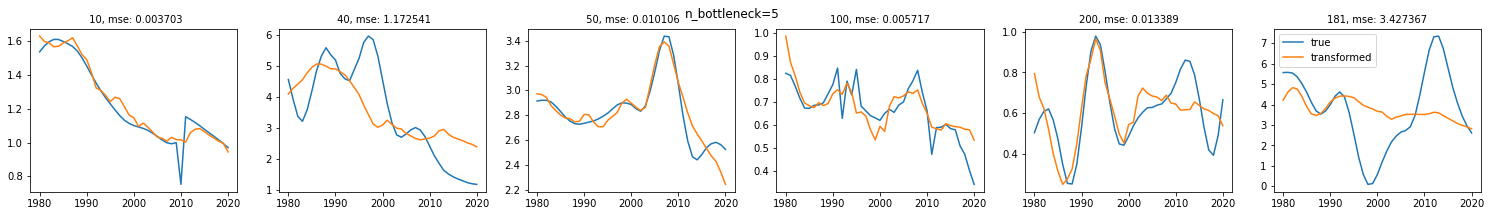

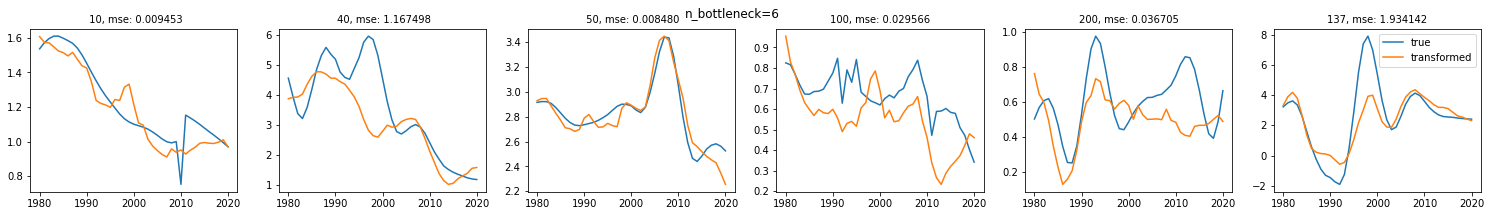

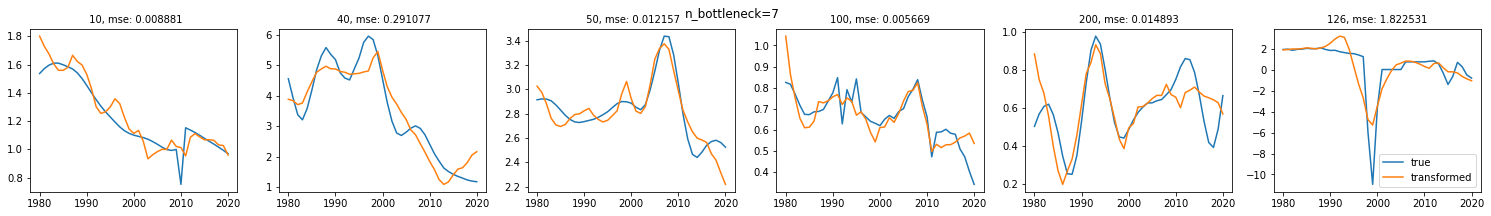

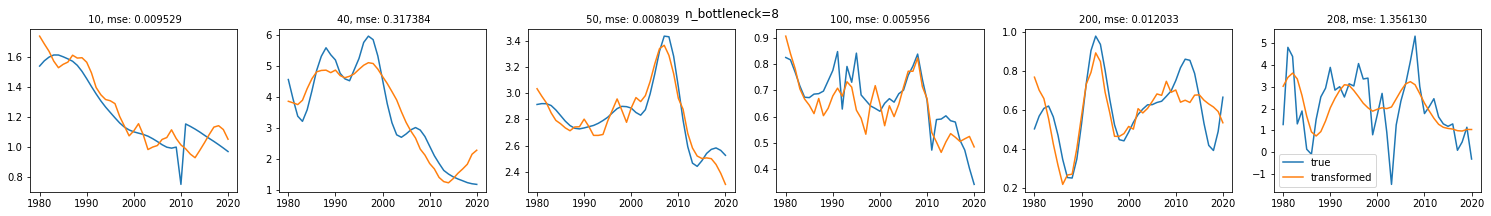

In [22]:
plot_transformed_data_autoencoder(X_base, X, models_autoencoder_v1)

# Autoencoder v2

In [23]:
def create_autoencoder_v2(n_bottleneck):
    autoencoder = tf.keras.Sequential([
        tf_layers.Input((X.shape[1], )),
        
        tf_layers.Dense(20, activation='relu'),
        tf_layers.Dense(n_bottleneck, activation='relu'),
        tf_layers.Dense(20, activation='relu'),
        
        tf_layers.Dense(X.shape[1])
    ])

    autoencoder.compile(tf.keras.optimizers.Adam(learning_rate=0.001),
                        loss='mse')
    return autoencoder

In [24]:
n_epochs_2 = 2500
histories_autoencoder_v2, models_autoencoder_v2 = test_autoencoder(create_autoencoder_v2, 1, 9, name='autoencoder_v2', n_epochs=n_epochs_2, train=TRAIN_AUTOENCODERS)

Starting 1... 34.84 s
Starting 2... 34.47 s
Starting 3... 35.34 s
Starting 4... 33.60 s
Starting 5... 33.44 s
Starting 6... 35.71 s
Starting 7... 35.92 s
Starting 8... 35.20 s


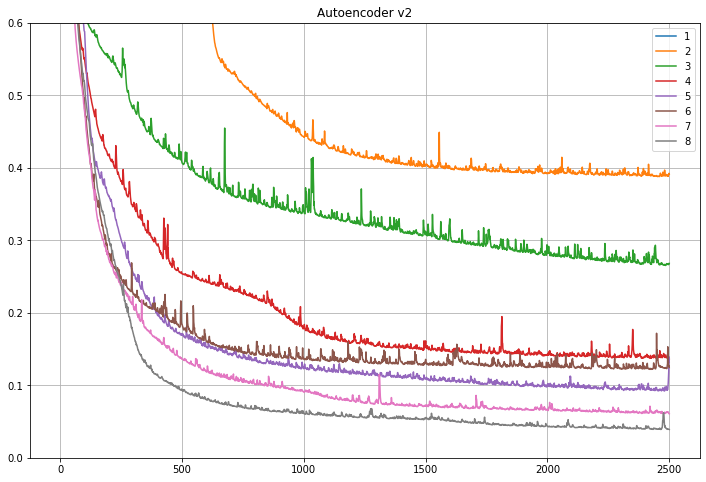

n_bottleneck= 1: mse=0.857799
n_bottleneck= 2: mse=0.388087
n_bottleneck= 3: mse=0.265384
n_bottleneck= 4: mse=0.136704
n_bottleneck= 5: mse=0.092230
n_bottleneck= 6: mse=0.122010
n_bottleneck= 7: mse=0.060666
n_bottleneck= 8: mse=0.039093


In [25]:
plot_histories(histories_autoencoder_v2, 'Autoencoder v2', n_epochs=n_epochs_2)

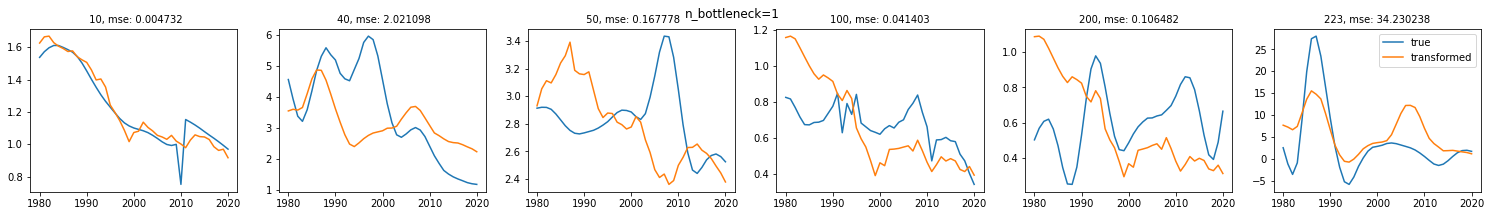

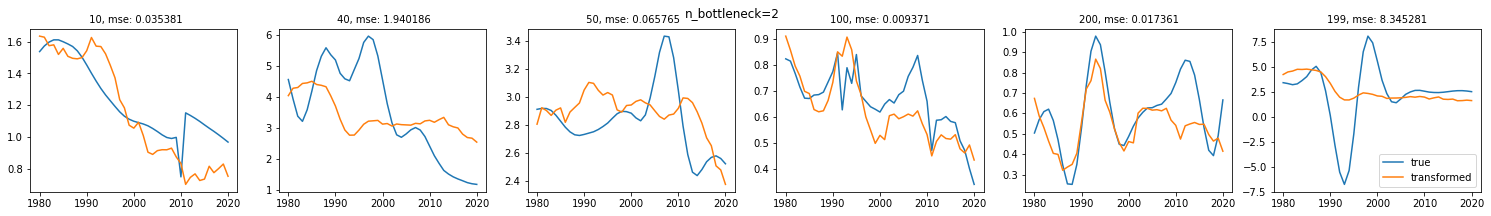

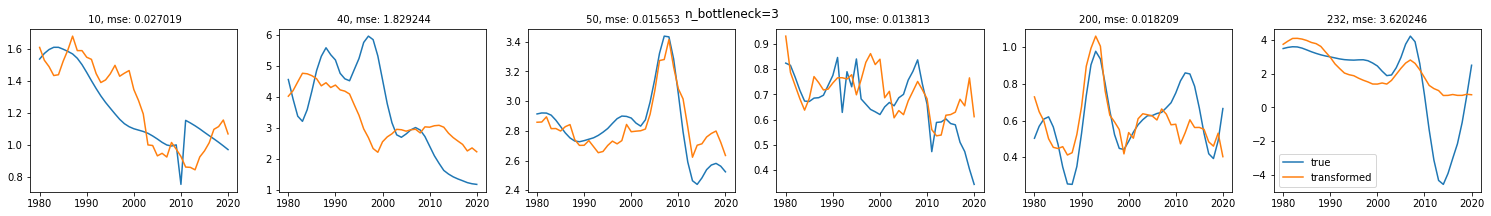

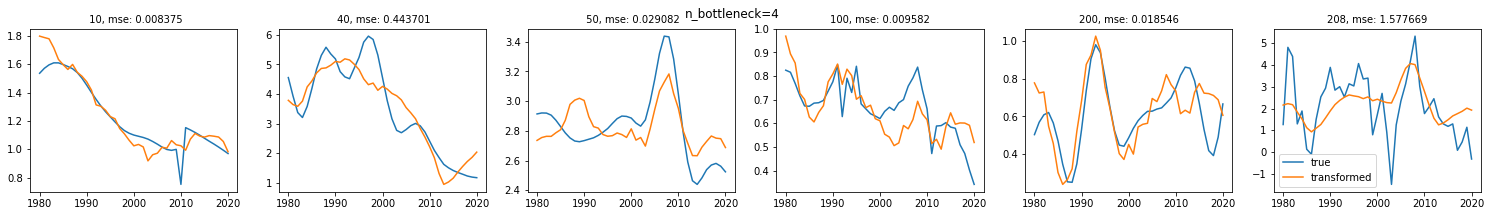

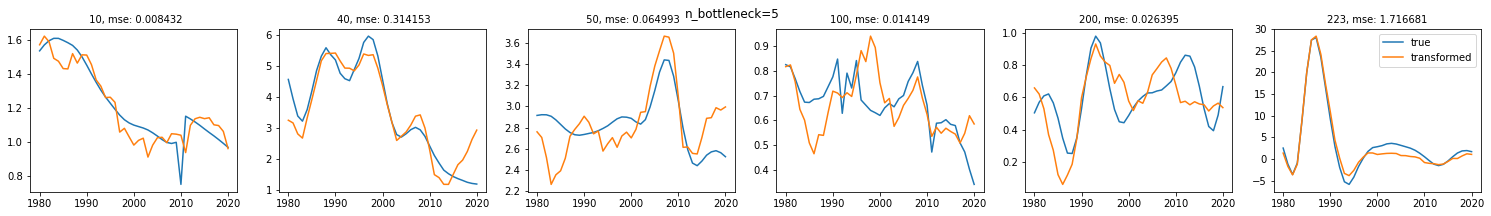

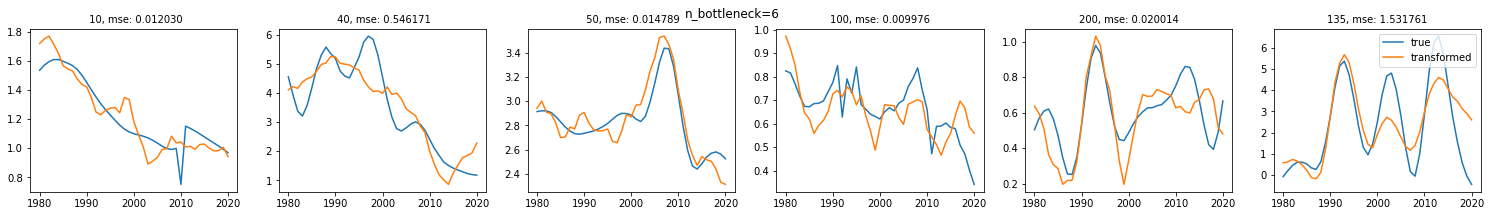

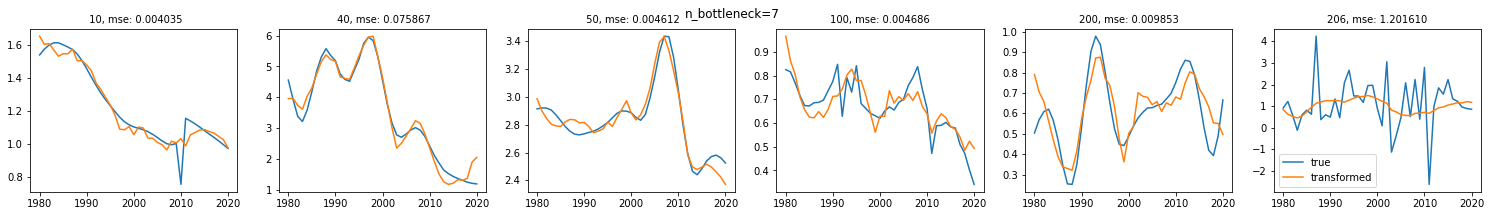

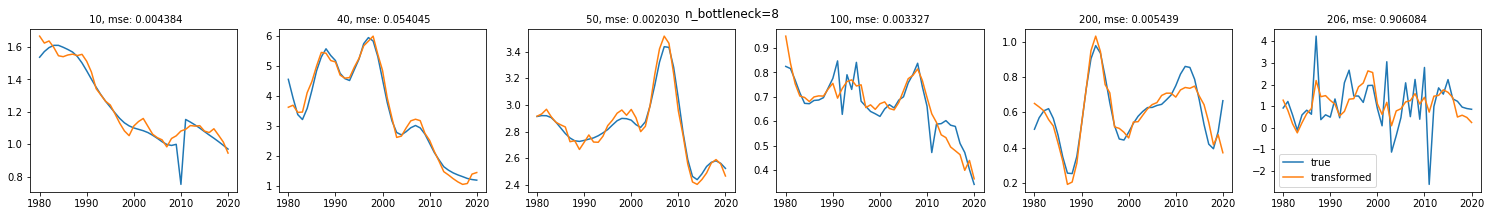

In [26]:
plot_transformed_data_autoencoder(X_base, X, models_autoencoder_v2)

# Autoencoder v3

In [27]:
def create_autoencoder_v3(n_bottleneck):
    autoencoder = tf.keras.Sequential([
        tf_layers.Input((X.shape[1], )),
        tf_layers.Dense(80, activation='relu'),
        tf_layers.Dense(40, activation='relu'),
        tf_layers.Dense(20, activation='relu'),
        tf_layers.Dense(n_bottleneck, activation='relu'),
        tf_layers.Dense(20, activation='relu'),
        tf_layers.Dense(40, activation='relu'),
        tf_layers.Dense(80, activation='relu'),
        tf_layers.Dense(X.shape[1])
    ])

    autoencoder.compile(tf.keras.optimizers.Adam(learning_rate=0.0002),
                        loss='mse')
    return autoencoder

In [28]:
n_epochs_3 = 3000
histories_autoencoder_v3, models_autoencoder_v3 = test_autoencoder(create_autoencoder_v3, 1, 9, name='autoencoder_v3', n_epochs=n_epochs_3, train=TRAIN_AUTOENCODERS)

Starting 1... 56.97 s
Starting 2... 57.60 s
Starting 3... 57.15 s
Starting 4... 59.83 s
Starting 5... 60.76 s
Starting 6... 61.83 s
Starting 7... 61.02 s
Starting 8... 60.83 s


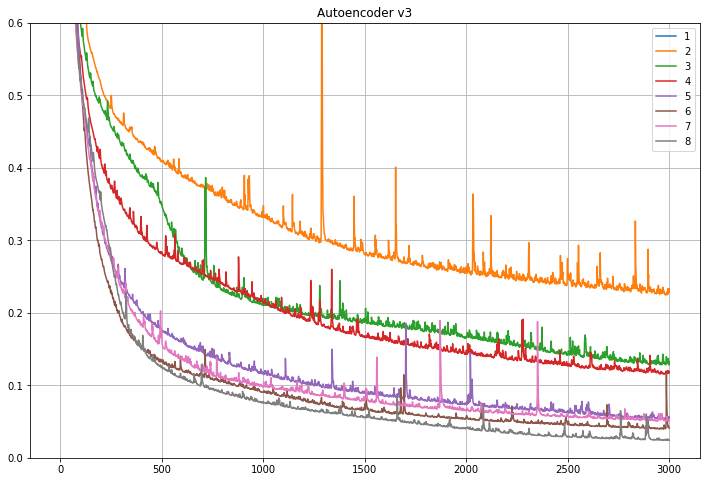

n_bottleneck= 1: mse=0.622009
n_bottleneck= 2: mse=0.224766
n_bottleneck= 3: mse=0.128142
n_bottleneck= 4: mse=0.115634
n_bottleneck= 5: mse=0.052837
n_bottleneck= 6: mse=0.039771
n_bottleneck= 7: mse=0.050271
n_bottleneck= 8: mse=0.024289


In [29]:
plot_histories(histories_autoencoder_v3, 'Autoencoder v3', n_epochs=n_epochs_3)

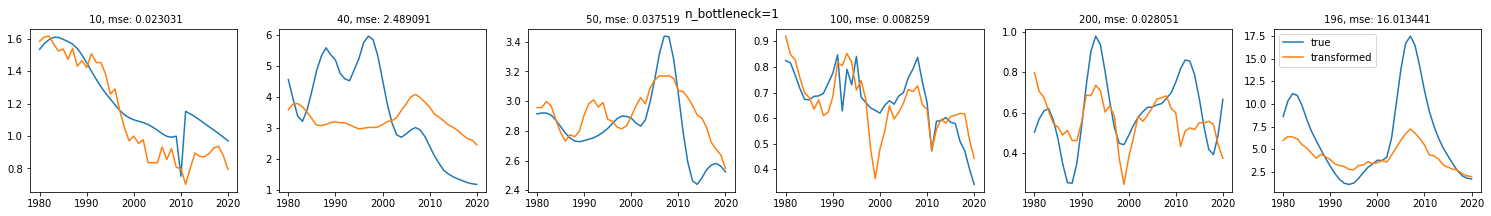

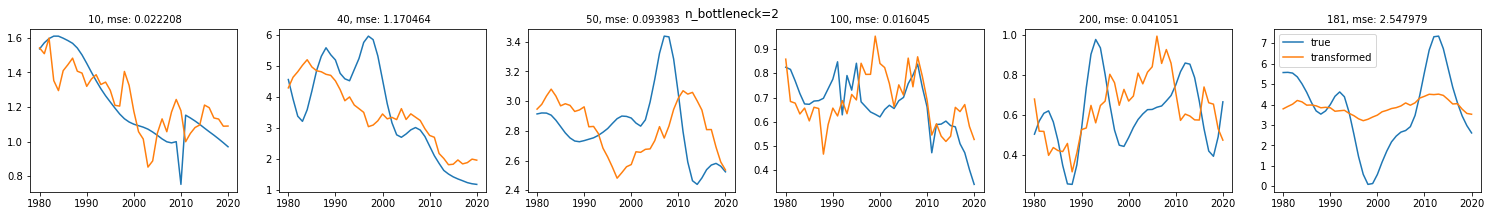

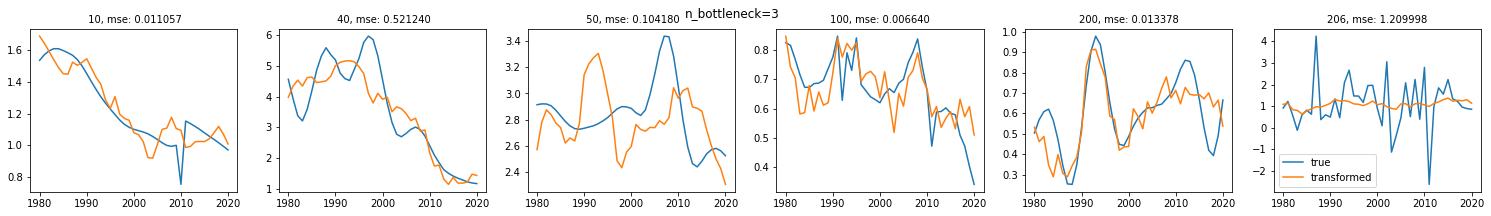

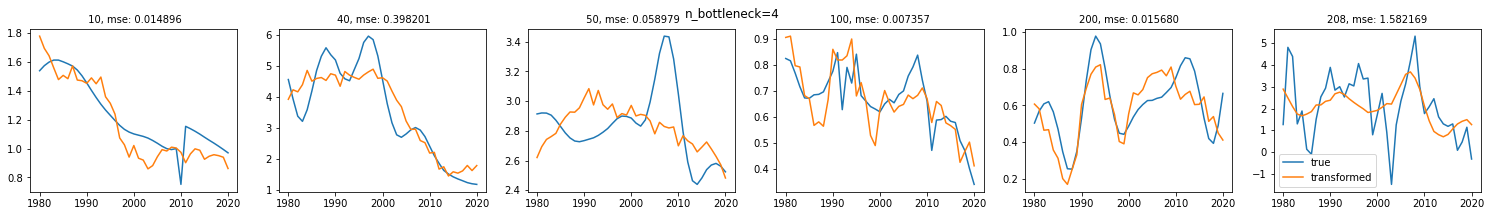

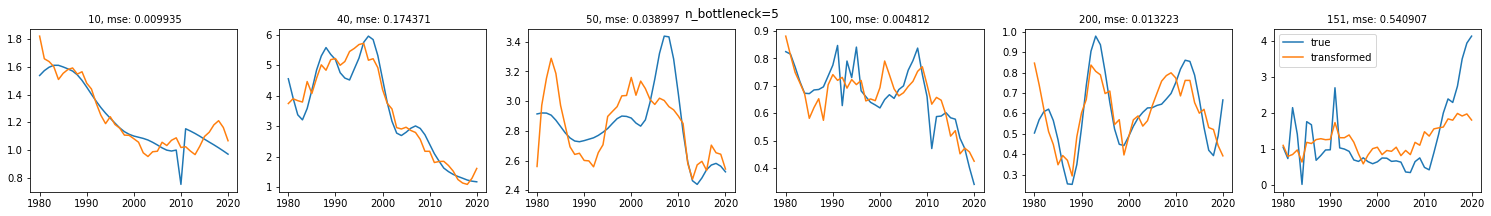

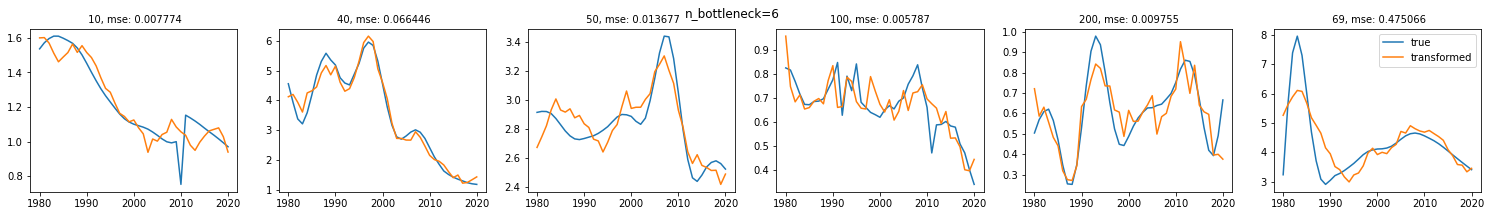

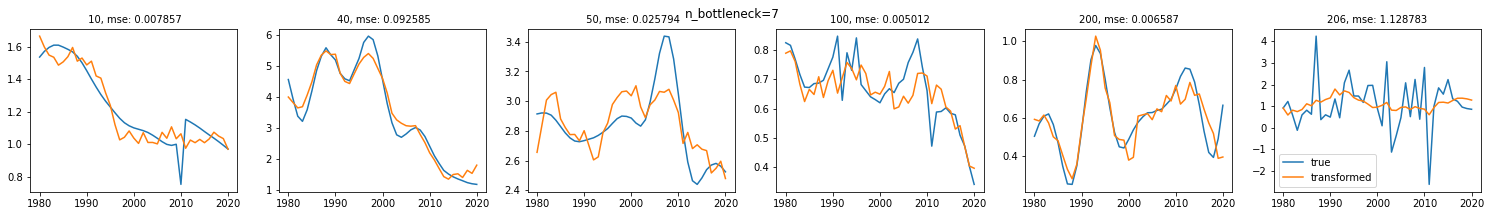

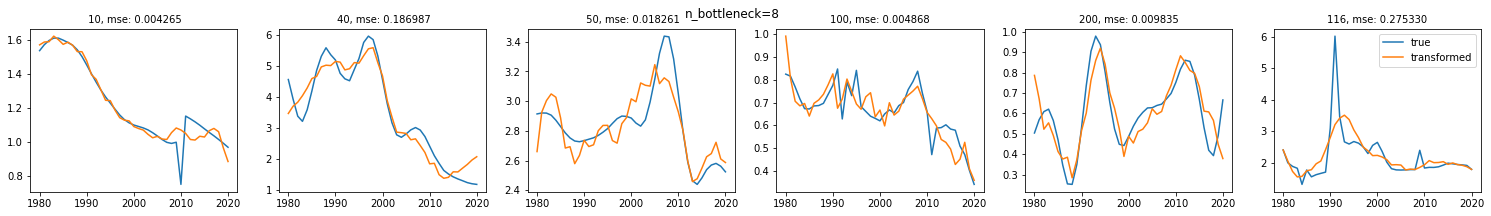

In [30]:
plot_transformed_data_autoencoder(X_base, X, models_autoencoder_v3)

# Autoencoder v4

In [31]:
def create_autoencoder_v4(n_bottleneck):
    autoencoder = tf.keras.Sequential([
        tf_layers.Input((X.shape[1], )),
        tf_layers.Reshape((-1, 1)),
        
        tf_layers.Conv1D(32, 3, activation='relu', padding='same'),
        tf_layers.MaxPooling1D(),
        
        tf_layers.Conv1D(64, 3, activation='relu', padding='same'),
        tf_layers.MaxPooling1D(),
        
        tf_layers.Flatten(),
        tf_layers.Dense(n_bottleneck, activation='relu'),
        
        tf_layers.Dense(X.shape[1] // 2 // 2 * 64, activation='relu'),
        tf_layers.Reshape((-1, 64)),
        tf_layers.Conv1D(64, 3, activation='relu', padding='same'),
        
        tf_layers.UpSampling1D(),
        tf_layers.Conv1D(32, 3, activation='relu', padding='same'),
        
        tf_layers.Flatten(),
        tf_layers.Dense(X.shape[1])
    ])

    autoencoder.compile(tf.keras.optimizers.Adam(learning_rate=0.00012),
                        loss='mse')
    return autoencoder

In [32]:
n_epochs_4 = 3000
histories_autoencoder_v4, models_autoencoder_v4 = test_autoencoder(create_autoencoder_v4, 1, 9, name='autoencoder_v4', n_epochs=n_epochs_4, train=TRAIN_AUTOENCODERS, batch_size=128)

Starting 1... 58.12 s
Starting 2... 58.00 s
Starting 3... 56.02 s
Starting 4... 55.80 s
Starting 5... 55.70 s
Starting 6... 55.99 s
Starting 7... 55.46 s
Starting 8... 55.46 s


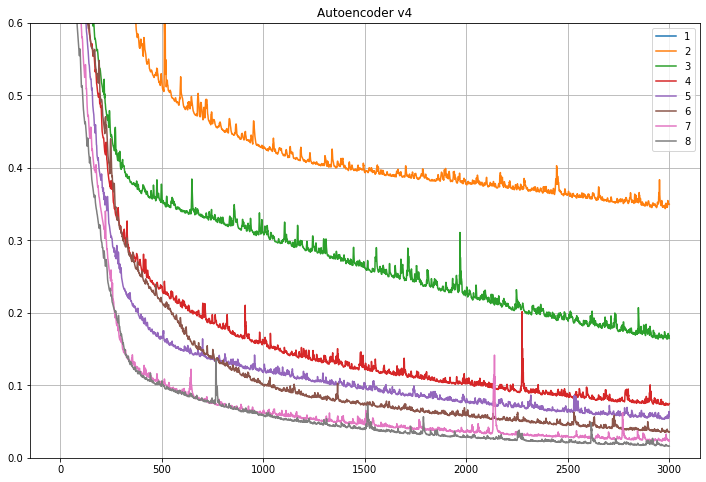

n_bottleneck= 1: mse=0.693423
n_bottleneck= 2: mse=0.343749
n_bottleneck= 3: mse=0.163750
n_bottleneck= 4: mse=0.072581
n_bottleneck= 5: mse=0.053092
n_bottleneck= 6: mse=0.035321
n_bottleneck= 7: mse=0.023134
n_bottleneck= 8: mse=0.015836


In [33]:
plot_histories(histories_autoencoder_v4, 'Autoencoder v4', n_epochs=n_epochs_4)

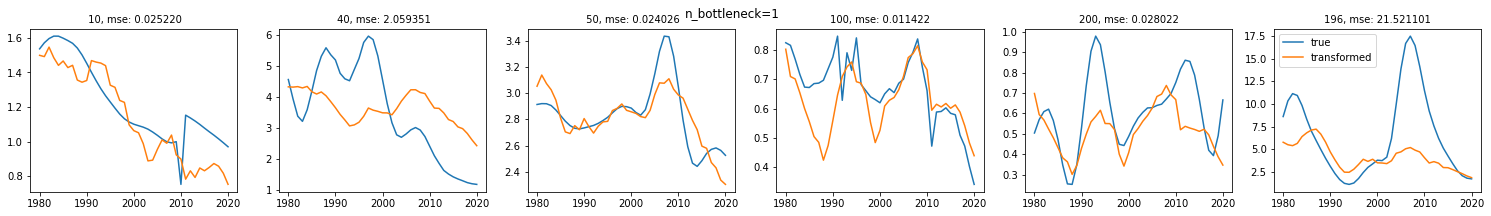

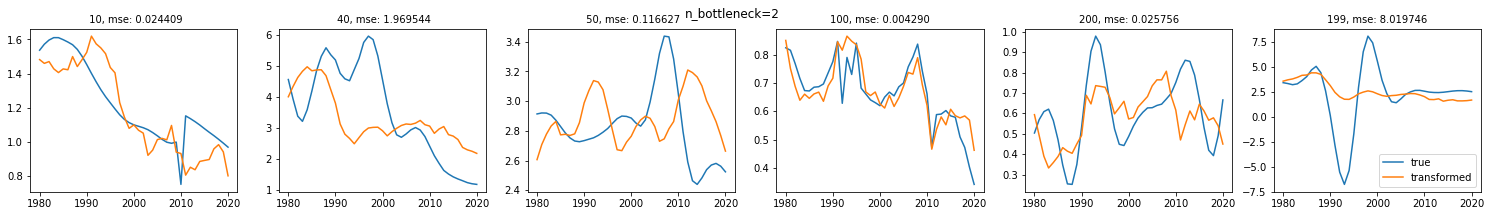

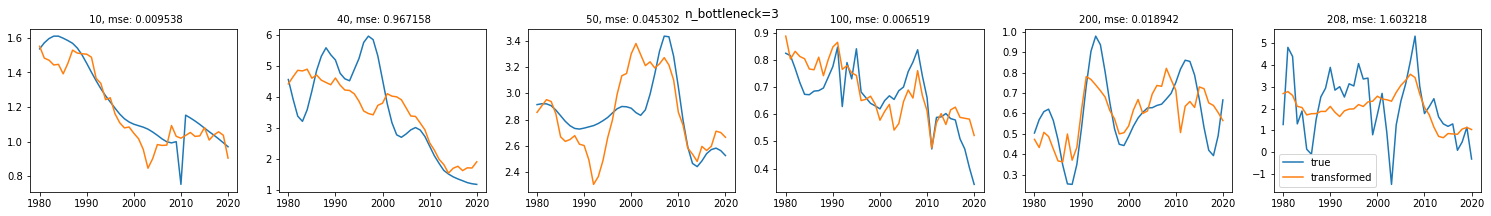

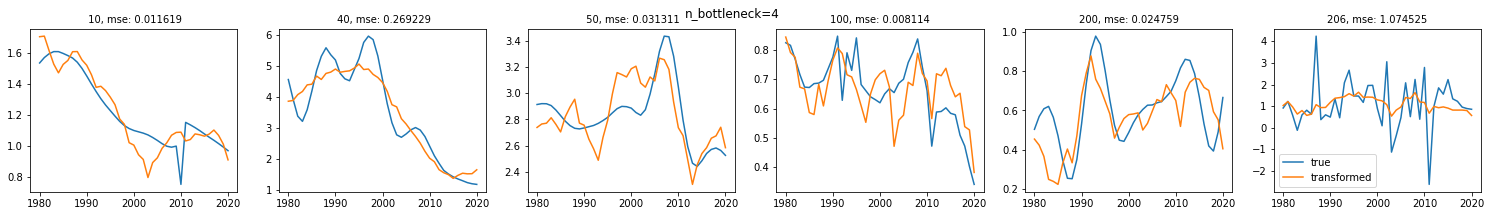

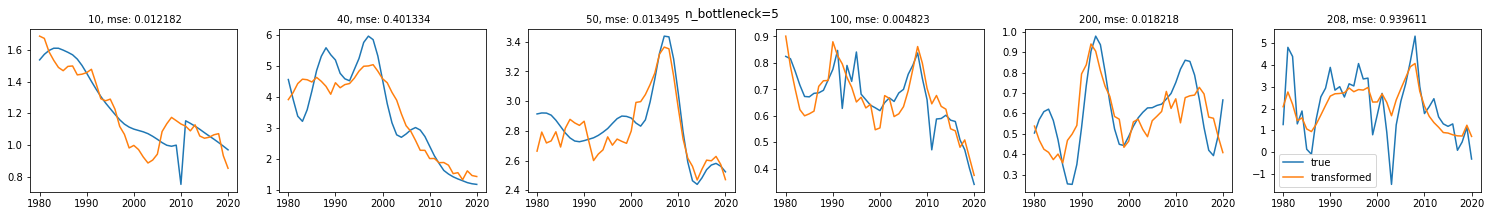

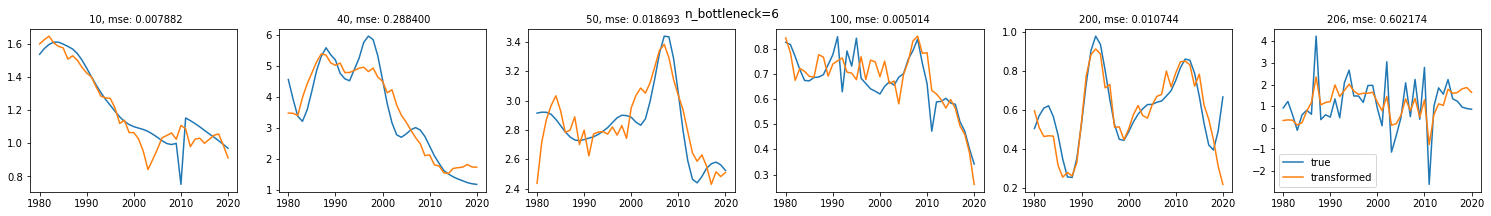

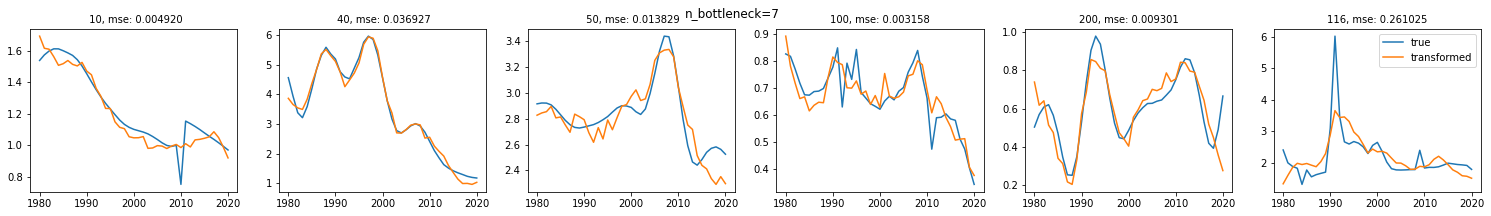

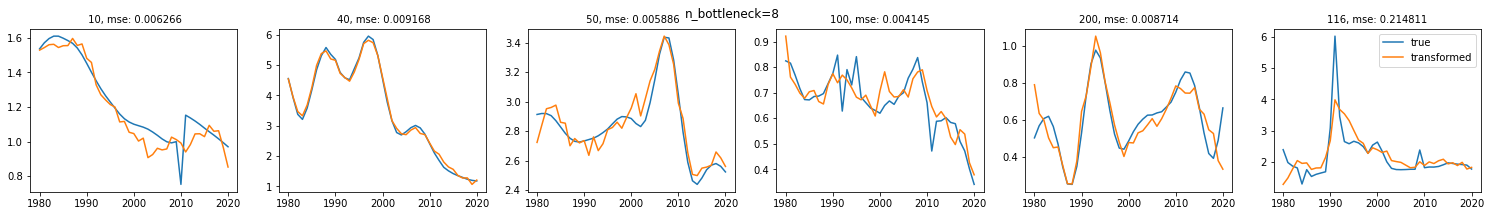

In [34]:
plot_transformed_data_autoencoder(X_base, X, models_autoencoder_v4)

# Autoencoder v5

In [35]:
def create_autoencoder_v5(n_bottleneck):
    autoencoder = tf.keras.Sequential([
        tf_layers.Input((X.shape[1], )),
        tf_layers.Reshape((-1, 1)),
        
        tf_layers.Conv1D(32, 3, activation='relu', padding='same'),
        tf_layers.MaxPooling1D(),
        
        tf_layers.Conv1D(64, 3, activation='relu', padding='same'),
        tf_layers.MaxPooling1D(),
        
        tf_layers.Conv1D(128, 3, activation='relu', padding='same'),
        tf_layers.MaxPooling1D(),
        
        tf_layers.Flatten(),
        tf_layers.Dense(n_bottleneck, activation='relu'),
        
        tf_layers.Dense(X.shape[1] // 2 // 2 // 2 * 128, activation='relu'),
        tf_layers.Reshape((-1, 128)),
        tf_layers.Conv1D(128, 3, activation='relu', padding='same'),
        
        tf_layers.UpSampling1D(),
        tf_layers.Conv1D(64, 3, activation='relu', padding='same'),
        
        tf_layers.UpSampling1D(),
        tf_layers.Conv1D(32, 3, activation='relu', padding='same'),
        
        tf_layers.Flatten(),
        tf_layers.Dense(X.shape[1])
    ])

    autoencoder.compile(tf.keras.optimizers.Adam(learning_rate=0.000055),
                        loss='mse')
    return autoencoder

In [36]:
n_epochs_5 = 4000
histories_autoencoder_v5, models_autoencoder_v5 = test_autoencoder(create_autoencoder_v5, 1, 9, name='autoencoder_v5', n_epochs=n_epochs_5, train=TRAIN_AUTOENCODERS, batch_size=128)

Starting 1... 95.78 s
Starting 2... 95.75 s
Starting 3... 93.37 s
Starting 4... 103.65 s
Starting 5... 92.61 s
Starting 6... 94.58 s
Starting 7... 92.34 s
Starting 8... 95.50 s


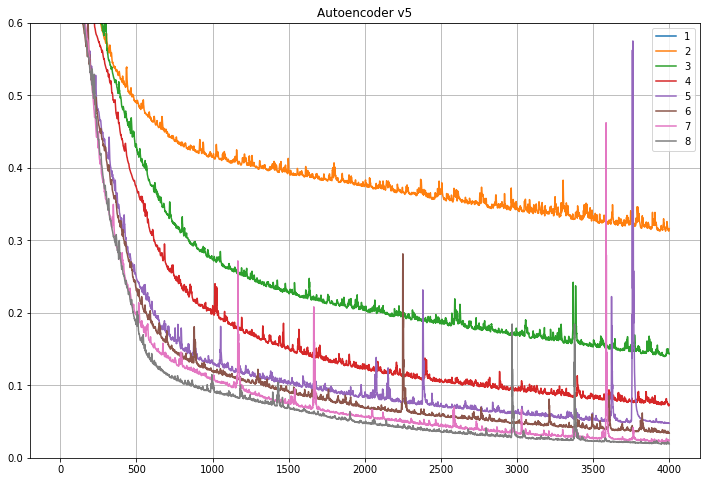

n_bottleneck= 1: mse=0.603241
n_bottleneck= 2: mse=0.312655
n_bottleneck= 3: mse=0.139637
n_bottleneck= 4: mse=0.071830
n_bottleneck= 5: mse=0.047381
n_bottleneck= 6: mse=0.034081
n_bottleneck= 7: mse=0.022418
n_bottleneck= 8: mse=0.019226


In [37]:
plot_histories(histories_autoencoder_v5, 'Autoencoder v5', n_epochs=n_epochs_5)

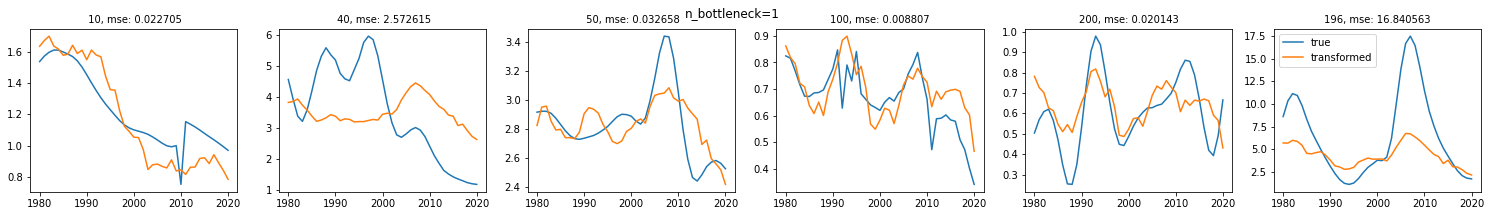

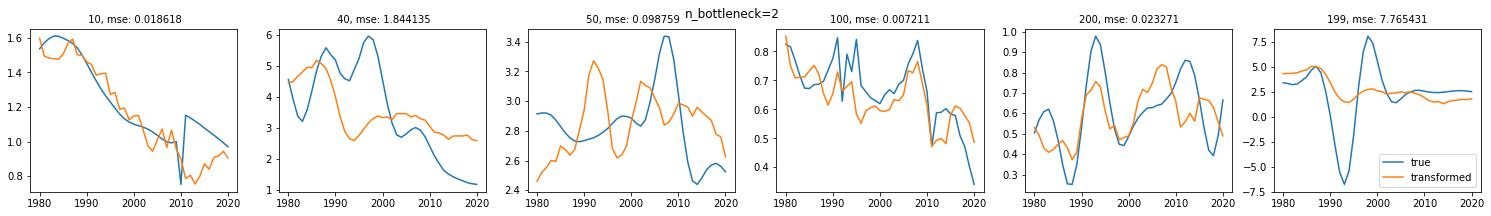

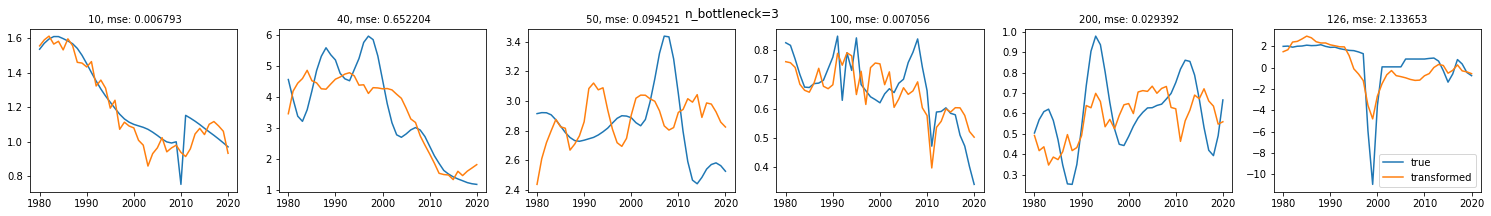

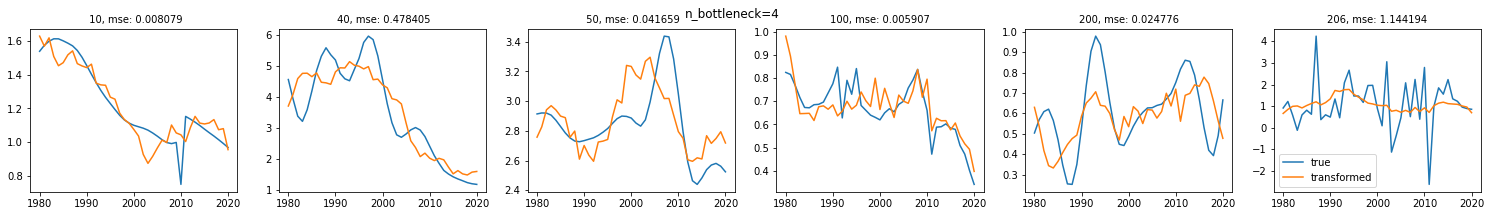

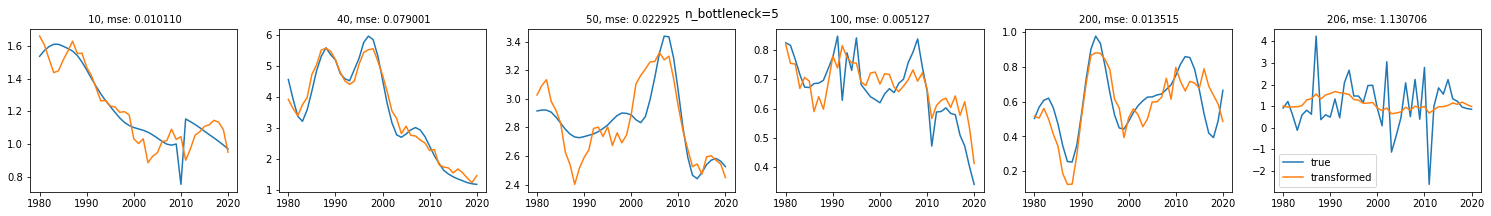

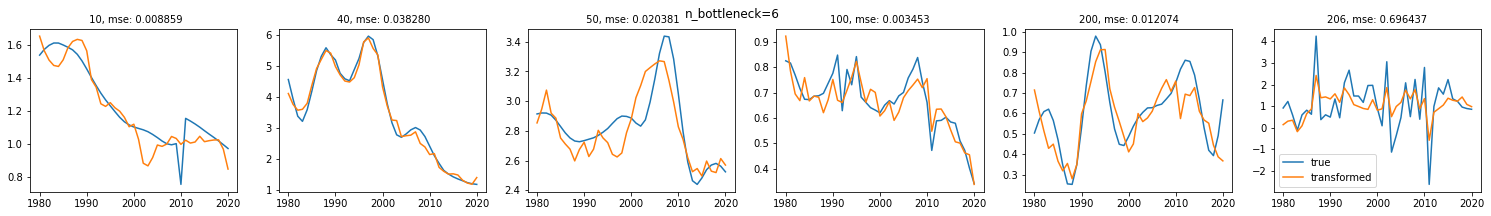

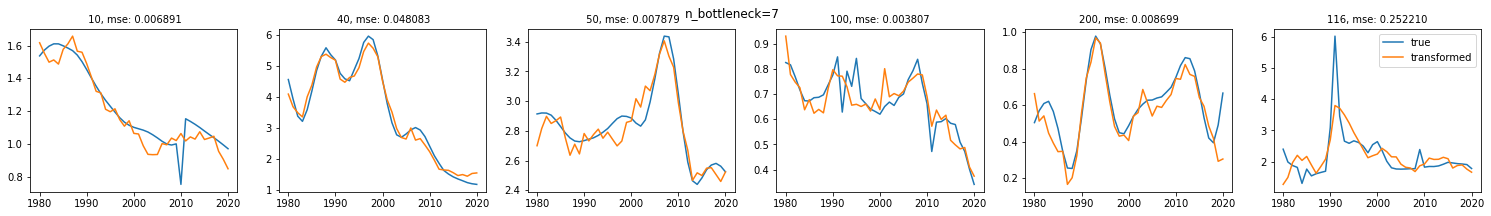

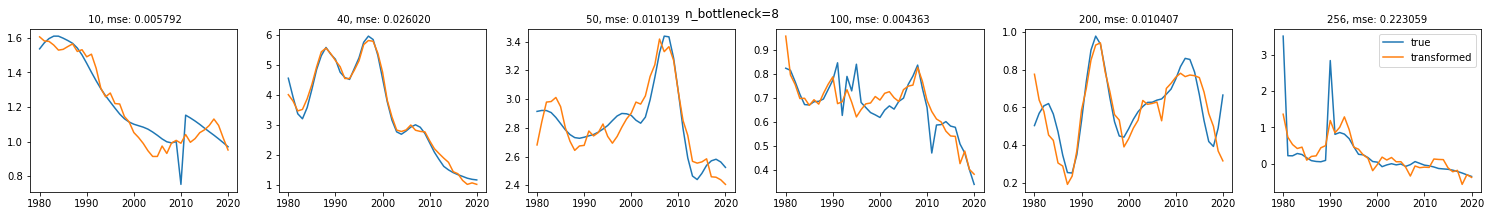

In [38]:
plot_transformed_data_autoencoder(X_base, X, models_autoencoder_v5)